# Importation

In [206]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import ast
from collections import Counter


In [207]:
df_lyon = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')
df_paris = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')

# AED

In [208]:
df_lyon.columns == df_paris.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [209]:
# Liste des colonnes peu pertinentes pour la prédiction du prix
cols_to_drop = [
    'id',
    'listing_url',
    'scrape_id',
    'last_scraped',
    'source',
    'neighbourhood_group_cleansed',
    'picture_url',
    'calendar_updated',
    'host_url',
  
    'host_since',

    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_thumbnail_url',
    'host_picture_url',






    'license'
]

# Suppression des colonnes non pertinentes
df_paris.drop(columns=cols_to_drop, inplace=True)
df_lyon.drop(columns=cols_to_drop, inplace=True)

In [210]:
df = pd.concat([df_paris, df_lyon], ignore_index=True)

In [211]:
# Filtrer les colonnes avec 100% de valeurs manquantes
columns_with_100_percent_missing = null_percentage[null_percentage == 100]
print(columns_with_100_percent_missing)

calendar_updated    100.0
dtype: float64


In [212]:
df

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",f,Alésia,1.0,1.0,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
1,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",7903,Borzou,"Paris, France",NaN,Saint-Paul - Ile Saint-Louis,2.0,4.0,...,4.82,4.85,4.96,4.59,f,1,1,0,0,2.26
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,2626,Franck,"Paris, France",t,Le Marais,2.0,10.0,...,4.92,4.89,4.94,4.74,f,2,2,0,0,2.20
3,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,22155,Anaïs,"Paris, France",f,Gare du Nord - Gare de I'Est,1.0,1.0,...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.03
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,28422,Bernadette,"New York, NY",f,Châtelet - Les Halles - Beaubourg,2.0,4.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182057,Studio ensoleillé sur Canal,"Sunny studio on Canal de l 'Ourcq, metro Laumi...",NaN,38574929,Anna,"Paris, France",f,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
182058,Studio bohémien,Enjoy a Parisian life in this studio facing th...,NaN,595527331,Ahmed,NaN,f,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
182059,Cozy Apartment - Marais - Pelee,Just steps from the vibrant Place de la Bastil...,The apartment is located in one of the most li...,156775524,Merveil,"Paris, France",f,Châtelet - Les Halles - Beaubourg,108.0,114.0,...,NaN,NaN,NaN,NaN,t,107,107,0,0,NaN
182060,Cozy Apartment - Tour Eiffel - Finlay,Located in a prestigious area just a few minut...,This apartment is ideally located in a prestig...,156775524,Merveil,"Paris, France",f,Châtelet - Les Halles - Beaubourg,108.0,114.0,...,NaN,NaN,NaN,NaN,t,107,107,0,0,NaN


In [213]:
df.dropna(inplace=True)

In [214]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",f,Alésia,1.0,1.0,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
5,Paris petit coin douillet,"I am a retired lady, who offers a pleasant lit...","Vibrant neighborhood, full of bars, cafés, fre...",33534,Elisabeth,"Paris, France",f,République,1.0,1.0,...,4.98,4.87,4.87,4.90,f,1,1,0,0,0.36
7,"Heart of Paris, brand new aparment.",Very confortable and bright studio (18m2). The...,This studio is in a building from 19th century...,42666,Brigitte,France,t,République,2.0,2.0,...,4.92,4.92,4.92,4.69,f,2,2,0,0,0.09
8,Loft very charming in Paris,My apartment is located in a very pretty court...,I am right next to the Chinatown which is very...,44444,Laurence,"Paris, France",f,Place d'Italie - Quartier Chinois,1.0,1.0,...,4.94,4.95,4.83,4.77,f,1,1,0,0,0.81
10,Voltaire Charm,You will spend a pleasant stay in this bright ...,﻿<br />The apartment is located in the 11th di...,48733,Irene,"Paris, France",f,XI Arrondissement,1.0,3.0,...,4.84,4.87,4.81,4.65,t,1,1,0,0,0.77


In [215]:
df.isnull().sum().sum()

np.int64(0)

In [216]:
df.drop_duplicates(inplace=True)

In [217]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",f,Alésia,1.0,1.0,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
5,Paris petit coin douillet,"I am a retired lady, who offers a pleasant lit...","Vibrant neighborhood, full of bars, cafés, fre...",33534,Elisabeth,"Paris, France",f,République,1.0,1.0,...,4.98,4.87,4.87,4.90,f,1,1,0,0,0.36
7,"Heart of Paris, brand new aparment.",Very confortable and bright studio (18m2). The...,This studio is in a building from 19th century...,42666,Brigitte,France,t,République,2.0,2.0,...,4.92,4.92,4.92,4.69,f,2,2,0,0,0.09
8,Loft very charming in Paris,My apartment is located in a very pretty court...,I am right next to the Chinatown which is very...,44444,Laurence,"Paris, France",f,Place d'Italie - Quartier Chinois,1.0,1.0,...,4.94,4.95,4.83,4.77,f,1,1,0,0,0.81
10,Voltaire Charm,You will spend a pleasant stay in this bright ...,﻿<br />The apartment is located in the 11th di...,48733,Irene,"Paris, France",f,XI Arrondissement,1.0,3.0,...,4.84,4.87,4.81,4.65,t,1,1,0,0,0.77


In [218]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

name                                            0.0
description                                     0.0
neighborhood_overview                           0.0
host_id                                         0.0
host_name                                       0.0
host_location                                   0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_verifications                              0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates

In [219]:
# Extraire le symbole de la colonne 'price'
df['currency_symbol'] = df['price'].str.extract(r'(\D)')

#On retire le symbole de la colonne 'price'
df['price'] = df['price'].str.replace(r'(\D)', '', regex=True)

#O convertit la colonne 'price' en float
df['price'] = df['price'].astype(float)

In [220]:

# Convertir la chaîne de texte en liste Python
df['amenities_list'] = df['amenities'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df['num_amenities'] = df['amenities_list'].apply(len)


# Récupérer les 20 équipements les plus fréquents
all_amenities = df['amenities_list'].explode()
top_amenities = [amenity for amenity, _ in Counter(all_amenities).most_common(20)]

# Créer une colonne binaire par équipement
for amenity in top_amenities:
    df[f'amenity_{amenity.lower().replace(" ", "_").replace("-", "_")}'] = df['amenities_list'].apply(lambda x: int(amenity in x))


In [221]:
correlations = df.corr(numeric_only=True)
print(correlations)

                                               host_id  host_listings_count  \
host_id                                       1.000000             0.233994   
host_listings_count                           0.233994             1.000000   
host_total_listings_count                     0.198522             0.969153   
latitude                                      0.019411            -0.009459   
longitude                                    -0.080704            -0.147285   
accommodates                                  0.049976             0.061680   
bathrooms                                    -0.006224             0.077300   
bedrooms                                     -0.043919             0.085292   
beds                                         -0.029645             0.022108   
price                                        -0.037935             0.029104   
minimum_nights                               -0.050062             0.024630   
maximum_nights                                0.0325

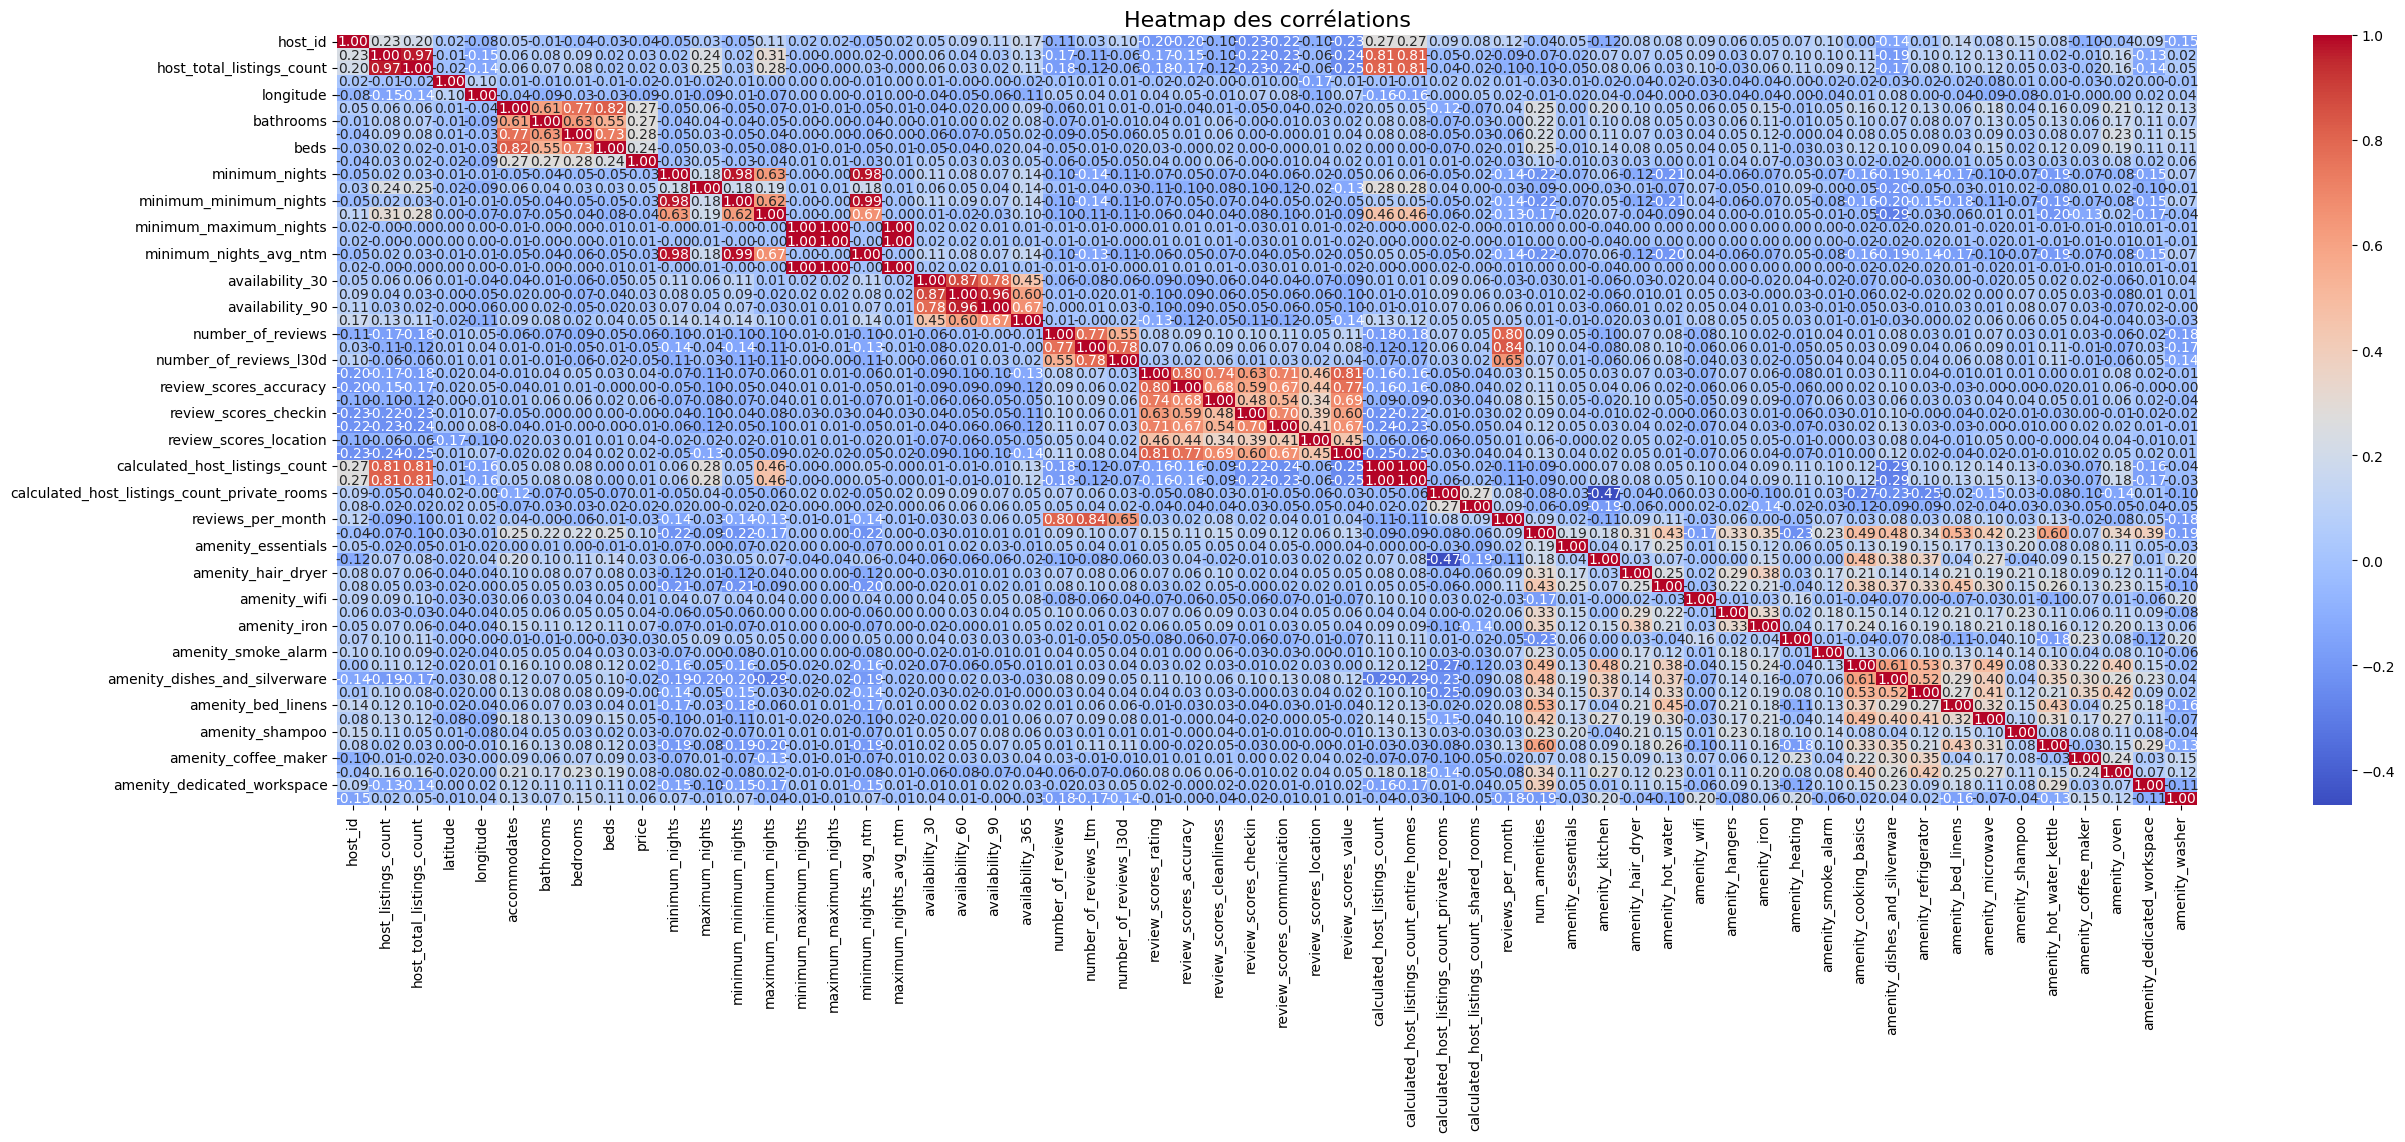

In [222]:
# Création du heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Heatmap des corrélations", fontsize=16)

# Afficher le graphique
plt.show()

In [223]:
correlations['price'].sort_values(ascending=False)

price                                           1.000000
bedrooms                                        0.278092
bathrooms                                       0.273348
accommodates                                    0.268787
beds                                            0.239951
num_amenities                                   0.098352
amenity_oven                                    0.076513
amenity_iron                                    0.069429
amenity_washer                                  0.062620
review_scores_cleanliness                       0.057558
maximum_nights                                  0.053278
availability_30                                 0.051107
amenity_microwave                               0.047119
availability_365                                0.046079
amenity_hangers                                 0.041151
review_scores_location                          0.040761
review_scores_rating                            0.036196
amenity_kitchen                

In [224]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,amenity_dishes_and_silverware,amenity_refrigerator,amenity_bed_linens,amenity_microwave,amenity_shampoo,amenity_hot_water_kettle,amenity_coffee_maker,amenity_oven,amenity_dedicated_workspace,amenity_washer
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",f,Alésia,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
5,Paris petit coin douillet,"I am a retired lady, who offers a pleasant lit...","Vibrant neighborhood, full of bars, cafés, fre...",33534,Elisabeth,"Paris, France",f,République,1.0,1.0,...,1,1,1,1,1,0,1,1,1,0
7,"Heart of Paris, brand new aparment.",Very confortable and bright studio (18m2). The...,This studio is in a building from 19th century...,42666,Brigitte,France,t,République,2.0,2.0,...,1,1,1,1,0,1,1,0,1,0
8,Loft very charming in Paris,My apartment is located in a very pretty court...,I am right next to the Chinatown which is very...,44444,Laurence,"Paris, France",f,Place d'Italie - Quartier Chinois,1.0,1.0,...,1,1,1,1,1,1,1,1,1,0
10,Voltaire Charm,You will spend a pleasant stay in this bright ...,﻿<br />The apartment is located in the 11th di...,48733,Irene,"Paris, France",f,XI Arrondissement,1.0,3.0,...,1,1,1,1,1,1,0,1,1,1


In [225]:
df.dtypes

name                           object
description                    object
neighborhood_overview          object
host_id                         int64
host_name                      object
                                ...  
amenity_hot_water_kettle        int64
amenity_coffee_maker            int64
amenity_oven                    int64
amenity_dedicated_workspace     int64
amenity_washer                  int64
Length: 81, dtype: object

In [226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Application du LabelEncoder sur la colonne property_type
df['has_availability'] = le.fit_transform(df['has_availability'])
df['host_is_superhost'] = le.fit_transform(df['host_is_superhost'])
df['host_has_profile_pic'] = le.fit_transform(df['host_has_profile_pic'])
df['host_identity_verified'] = le.fit_transform(df['host_identity_verified'])
	

In [227]:
df['has_availability'].dtypes

dtype('int64')

In [228]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,amenity_dishes_and_silverware,amenity_refrigerator,amenity_bed_linens,amenity_microwave,amenity_shampoo,amenity_hot_water_kettle,amenity_coffee_maker,amenity_oven,amenity_dedicated_workspace,amenity_washer
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",0,Alésia,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
5,Paris petit coin douillet,"I am a retired lady, who offers a pleasant lit...","Vibrant neighborhood, full of bars, cafés, fre...",33534,Elisabeth,"Paris, France",0,République,1.0,1.0,...,1,1,1,1,1,0,1,1,1,0
7,"Heart of Paris, brand new aparment.",Very confortable and bright studio (18m2). The...,This studio is in a building from 19th century...,42666,Brigitte,France,1,République,2.0,2.0,...,1,1,1,1,0,1,1,0,1,0
8,Loft very charming in Paris,My apartment is located in a very pretty court...,I am right next to the Chinatown which is very...,44444,Laurence,"Paris, France",0,Place d'Italie - Quartier Chinois,1.0,1.0,...,1,1,1,1,1,1,1,1,1,0
10,Voltaire Charm,You will spend a pleasant stay in this bright ...,﻿<br />The apartment is located in the 11th di...,48733,Irene,"Paris, France",0,XI Arrondissement,1.0,3.0,...,1,1,1,1,1,1,0,1,1,1


In [234]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est de type object (catégorique)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    else:  # Si la colonne est numérique
        df[column] = df[column].fillna(0)  # Remplir les valeurs manquantes avec 0 (ou une autre valeur par défaut)

In [235]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [236]:
X = df.drop(columns=['price'])
y = df['price']


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Choisis combien de features tu veux garder

rfe.fit(X_train, y_train)


In [ ]:
# Liste des features sélectionnées
selected_features = X.columns[rfe.support_]
print("Features sélectionnées :", list(selected_features))

# Tu peux ensuite entraîner ton modèle final sur ces features :
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print("RMSE :", mean_squared_error(y_test, y_pred, squared=False))
